# An End-to-End Data Science Pipeline
### Mohammad Mahdavi (November 16, 2020)

## Importing Modules

In [154]:
import math
import pandas
import matplotlib.pyplot

import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.neural_network
import sklearn.model_selection

## Loading the Dataset

In [115]:
df = pandas.read_csv("adult.csv")

## Exploring the Dataset

In [116]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


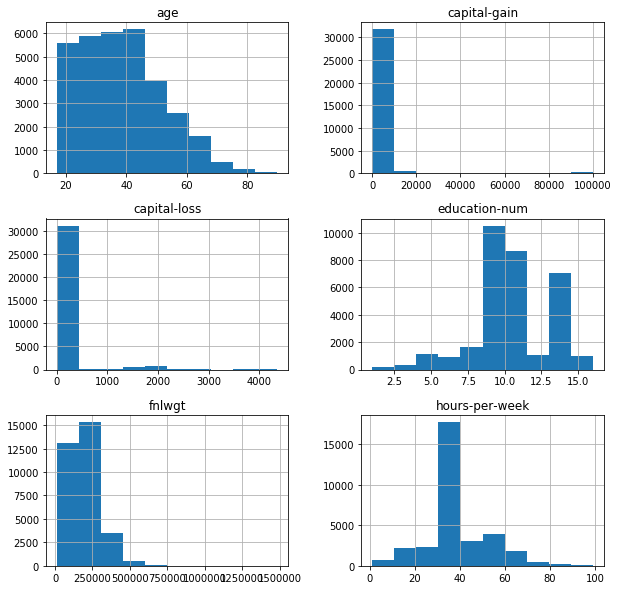

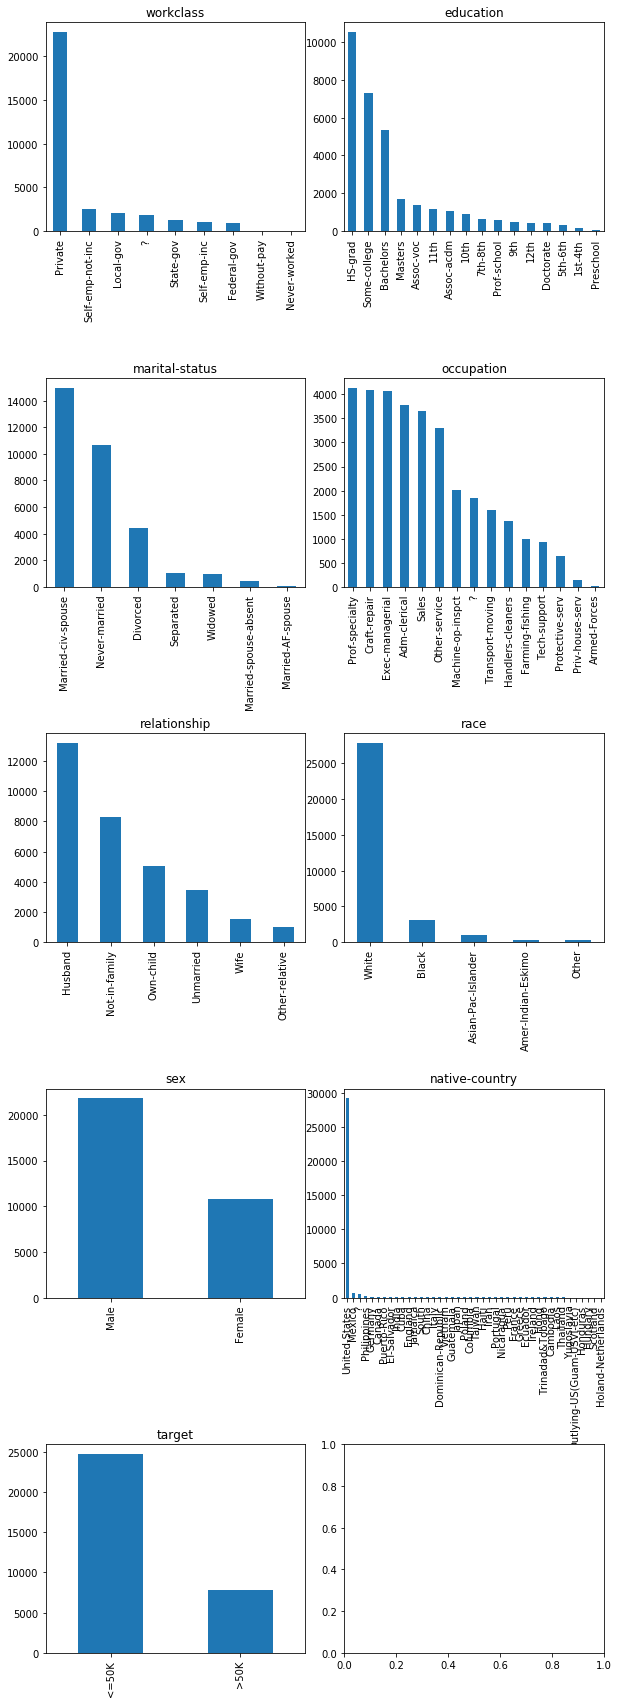

In [117]:
df.hist(figsize=(10, 10))
categorical_attributes = {c: 1 for c in df.columns if df[c].dtypes == "object"}
fig, ax = matplotlib.pyplot.subplots(math.ceil(len(categorical_attributes) / 2), 2, figsize=(10, 30))
matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.7)
for i, categorical_attribute in enumerate(df[categorical_attributes]):
    df[categorical_attribute] = df[categorical_attribute].str.strip()
    df[categorical_attribute].value_counts().plot(kind="bar", ax=ax[math.floor(i / 2), i % 2]).set_title(categorical_attribute)
fig.show()

## Removing Missing Values

In [119]:
df = df.loc[(df["workclass"] != "?") & (df["occupation"] != "?") & (df["native-country"] != "?")]

## Encoding the Categorical Attributes

In [153]:
x = pandas.get_dummies(df.drop("target", axis=1)).to_numpy()
y = [1 if b else 0 for b in df["target"] == ">50K"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20)

## Model Selection

In [156]:
def build_model(model="DTC"):
    if model == "DTC":
        parameters_grid = {"criterion": ["gini", "entropy"]}
        clf = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), 
                                                   parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
    elif model == "MLP":
        parameters_grid = {"hidden_layer_sizes": [50, 100, 200], "max_iter": [300]}
        clf = sklearn.model_selection.GridSearchCV(sklearn.neural_network.MLPClassifier(), 
                                                   parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
    elif model == "GBC":
        parameters_grid = {"n_estimators": [50, 100, 200]}
        clf = sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(), 
                                                   parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
    clf.fit(x_train, y_train)  
    return {"Model": model, "Accuracy": max(clf.cv_results_["mean_test_score"])}


results = pandas.DataFrame(columns=["Model", "Accuracy"])

for model in ["DTC", "MLP", "GBC"]:
    print("Model =", model)
    result = build_model(model=model)
    results = results.append(result, ignore_index=True)
    
results.head()

Model = DTC
Model = MLP
Model = GBC


,Model,Accuracy
0,DTC,0.811264
1,MLP,0.721373
2,GBC,0.867172


## Training and Testing the Best Model

In [160]:
parameters_grid = {"n_estimators": [50, 100, 200]}
clf = sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(), 
                                           parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print("Test Accuracy = {:.2f}".format(accuracy))

Test Accuracy = 0.86
